# KNN Search from Scratch

## 1st Step is to calculate Euclidean Distance.
We calculate euclidean distance between the two rows in dataset.

Euclidean distance = sqrt((x2-x1)^2 + (y2-y1)^2 + (z2-z1)^2 + ....)

In the test dataset provided below the first two columns are the input variables and the last column is the output which gives label as it is categorised in 0 and 1.


In [7]:
import math 
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)
# Taking a testing data to get the output:
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
# Finding Euclidean Distance of every row from first row
for row in dataset:
    distance = euclidean_distance(dataset[0], row)
    print(distance)


0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


## 2nd Step is to get Nearest Neighbors.
After calculating distance, you can find the 'K' nearest neighbors which will have the least distance from the target.


In [14]:
def get_neighbors(train, test_row, k):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
    print(neighbor)

[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]


As we can see in above code, first it will calculate the distance of each row from the train_row. And then add the train_row and it's distance as tuple  in the distances list. Then we sort the list __distances__ in ascending order , "key = lambda tup:tup[1] " means the key = the element at position 1 of the tuple ,i.e. distance. So the list distances get sorted in ascending order by distance.

After this , we will add all the trainrow of first "K" elements in the neighbors list.

## Step 3 is Making Predictions
After getting the most similar neighbors , we will make predictions.
In the case of classification, we can return the most represented class among the neighbors.

In [17]:
def predict_classification(train, test_row, k):
    neighbors = get_neighbors(train, test_row, k)
    output_values = [row[-1] for row in neighbors] 
    prediction = max(set(output_values), key=output_values.count)
    return prediction
prediction = predict_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Expected 0, Got 0.


In the above code, output values store the last value of each row in the neighbors list.
Then predicition finds the max value used in the set __output_values__ by counting the frequency of each number.

Then in last we print the actual value(Expected) and the predicted value(Got).

# KNN Search on Images:

## First step is to get the dataset of features of all images.
We'll take the feature matrix of colors for now.

In [6]:
import numpy as np

We'll define a function feature_extraction which will return the features vector of an image.

In [68]:
def feature_extraction(image):
    features_matrix = np.zeros((32,16))
    for i in range(0, image.shape[0]): #that is for the range of all rows
        for j in range(0,image.shape[1]): #the range of all columns
            features_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)
    features = np.reshape(features_matrix, (512))
    return features

Now, we'll load all the images from our folder __amazon_images_subset__  and save it in a dataset.

In [127]:
from skimage.io import imread, imshow
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
images_dataset = load_images_from_folder("sample_data/amazon_images_subset/")
print(len(dataset))

30


Now, as we stored all the images in __images_dataset__ , now we will check any random image from the dataset to ensure we are going right.

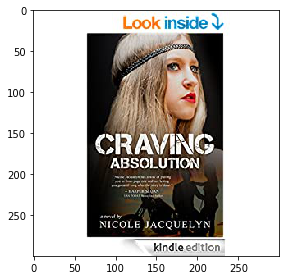

In [159]:
imshow(images_dataset[17])

Now, we'll resize all the pictures so that the total no. of pixels in each image are (512*3)

In [131]:
import skimage.transform
for i in range(len(dataset)):
    dataset[i]= skimage.transform.resize(images_dataset[i], (32,16))

Now, we are storing the features of all the images in __feature_dataset__. Also the method we used for feature extraction reduced the number of features from (512*3) to 512 by taking mean of the values of RGB channels.

In [132]:
feature_dataset = list()
for i in range(len(dataset)):
    features_vector = feature_extraction(dataset[i])
    feature_dataset.append(features_vector)

In [133]:
feature_dataset = np.array(feature_dataset)
print(feature_dataset.shape)

(30, 512)


## 2nd step is KNN Search
Now, we are defining a function to calculate the distance of other features from the features of our test image. Here, we are taking our 17th image as the test image.

The distance calculated here is Euclidean distance.

In [134]:
import math 
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)
# let's test for image 17th in our dataset. 
for row in feature_dataset:
    distance = euclidean_distance(feature_dataset[16], row)
    print(distance)


11.71418892720372
2.4267032964268394
3.681787005729087
5.65685424949238
2.560381915956202
3.055050463303893
2.5166114784235827
8.279828232249482
16.492422502470642
5.972157622389639
8.279828232249482
4.320493798938573
2.0275875100994067
5.280993172584953
3.2317865716108853
10.11599393699568
0.0
4.830458915396479
2.7688746209726913
11.97218999737865
4.7022453265552935
2.4267032964268385
2.3570226039551576
5.696002496878353
3.726779962499649
2.1081851067789197
2.8480012484391763
2.5819888974716103
5.23874454850057
8.279828232249482


In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

Now , we are defining a function to get nieghbors of the features of our test image. This will be done by sorting all the distances calculated in ascending order. So that, we can get first __k__ close neighbors. K can be decided by the user. 

In [136]:
def get_neighbors(train, test_row, k):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors
neighbors = get_neighbors(feature_dataset, feature_dataset[16], 3)
neighbors = np.array(neighbors)
print(neighbors.shape)
for neighbor in neighbors:
    print(neighbor)

(3, 512)
[1.         0.66666667 0.33333333 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         1.         0.33333333
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         1.         0.33333333 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         1.         0.33333333
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         1.         0.33333333 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.66666667 1.
 1.         0.33333333 0.      

## 3rd Step is to get Predictions
Now we know the neighbors , we have to print the images of the nearby neighbors we found. In this, first we'll try to get the index of the images whose features have been selected. So, for that we'll compare the features stored in both neighbors and feature_dataset. The indices of feature_dataset which get matched , will be used to store the images in the predictions list.

In [143]:
def predict(train, test_row, k):
    neighbors = get_neighbors(train, test_row, k)
    predictions = list()
    for i in range(3):
        for j in range(30):
            if((feature_dataset[j] == neighbors[i]).all(-1).any(-1)):
                predictions.append(images_dataset[j])
                break
    return predictions
predicted_images = predict(feature_dataset, feature_dataset[16],3)

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

In last, we are subplotting the 3 predictions we got.

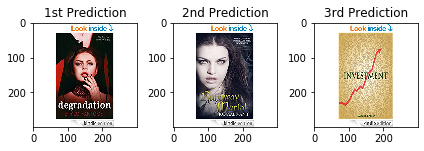

In [145]:
plt.subplot(1,3,1)
imshow(predicted_images[0])
plt.title('1st Prediction') 
plt.subplot(1,3,2)
imshow(predicted_images[1])
plt.title('2nd Prediction') 
plt.subplot(1,3,3)
imshow(predicted_images[2])
plt.title('3rd Prediction') 
plt.show()

## Now, Let's Try with edges vector 

In [146]:
import numpy as np
import skimage.feature

In [147]:
def edges_extraction(image):
    edges = edges =  skimage.feature.canny(
    image=image,
    sigma=1.0,
    low_threshold=0.4,
    high_threshold=0.9)
    edges = np.reshape(edges, (512))
    return edges

In [148]:
import skimage.color

The Important step in this is that the images should be 2-Dimensional, so for that we'll convert all the images to gray_scale.


In [149]:
for i in range(len(dataset)):
    dataset[i]= skimage.transform.resize(images_dataset[i], (32,16))
    dataset[i] = skimage.color.rgb2gray(dataset[i])

In [150]:
feature_dataset = list()
for i in range(len(dataset)):
    edges_vector = edges_extraction(dataset[i])
    feature_dataset.append(edges_vector)

The edges_vectors have values stored as true or false, that is why we need to convert them to integer form.

In [151]:
feature_dataset = np.array(feature_dataset).astype(int)
print(feature_dataset.shape)

(30, 512)


Rest will be the same method for KNN Search. Let our test image be the 22nd image this time.

In [157]:
predicted_images = predict(feature_dataset, feature_dataset[21],3)

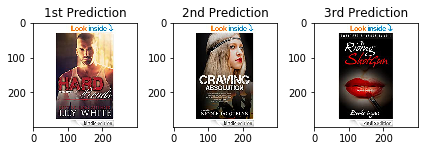

In [158]:
plt.subplot(1,3,1)
imshow(predicted_images[0])
plt.title('1st Prediction') 
plt.subplot(1,3,2)
imshow(predicted_images[1])
plt.title('2nd Prediction') 
plt.subplot(1,3,3)
imshow(predicted_images[2])
plt.title('3rd Prediction') 
plt.show()